In [1]:
import numpy as np
import pandas as pd

# load dataset into DataFrame Pandas
# the chosen dataset is the Kaggle : "Sentiment140 dataset with 1.6 million tweets" - contains 1,600,000 tweets extracted using the twitter api
data = pd.read_csv(
    "twitter-sentiment104analysis-kaggle-database.csv",
    encoding="latin-1",
)
data.columns = ["target", "ids", "date", "flag", "user", "text"]
display(data)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [2]:
# the kaggle description states that target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive) however it looks like there are no neutral values
set(data.target)

{0, 4}

In [3]:
#to classify (positive/negative), we need squash this number in the range [0, 1] for the sigmoid function
data.target = (data.target).replace(4,1)
display(data[['target', 'text']])

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
#taking into consideration the target - sentiment and text - tweet
tweet = data.columns.values[5]
sentiment = data.columns.values[0]
tweet, sentiment

('text', 'target')

In [6]:
#preprocessing of the tweets:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from tools.PreprocessTwt import CustomPreprocess

custom = CustomPreprocess()

data['processed_tweet'] = data[tweet].apply(custom.process_tweet)

In [7]:
pd.set_option('display.max_colwidth', None)
display(data[['target', 'text','processed_tweet' ]])

,target,text,processed_tweet
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,dived many times ball managed save rest go bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",no not behaving mad see
4,0,@Kwesidei not the whole crew,not whole crew
...,...,...,...
1599994,1,Just woke up. Having no school is the best feeling ever,woke no school best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,thewdb com cool hear old walt interviews â
1599996,1,Are you ready for your MoJo Makeover? Ask me for details,ready mojo makeover ask details
1599997,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,happy th birthday boo time tupac amaru shakur


In [8]:
#tokenization
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                          [dived, many, times, ball, managed, save, rest, go, bounds]
2                                              [whole, body, feels, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                  [hey, long, time, no, see, yes, rains, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                            [dived, many, time, ball, managed, save, rest, go, bound]
2                                               [whole, body, feel, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                   [hey, long, time, no, see, yes, rain, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [10]:
data['processed_tweet'] = tokenized_tweet
display(data)

,target,ids,date,flag,user,text,processed_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, update, facebook, texting, might, cry, result, school, today, also, blah]"
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[dived, many, time, ball, managed, save, rest, go, bound]"
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[no, not, behaving, mad, see]"
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[not, whole, crew]"
...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever,"[woke, no, school, best, feeling, ever]"
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,"[thewdb, com, cool, hear, old, walt, interview, â]"
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details,"[ready, mojo, makeover, ask, detail]"
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,"[happy, th, birthday, boo, time, tupac, amaru, shakur]"


In [11]:
#count vectorizer: it counts the number of words in the document i.e it converts a collection of text documents to a matrix of the counts of occurrences of each word in the document
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=500000)  # unigram and bigram
final_vectorized_data = count_vectorizer.fit_transform(data['processed_tweet'].apply(str))

final_vectorized_data

<1599999x500000 sparse matrix of type '<class 'numpy.int64'>'
	with 16919427 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import train_test_split
X=final_vectorized_data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8)

In [13]:
from sklearn.svm import LinearSVC
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

SVCmodel = LinearSVC(max_iter=100000)
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))

The execution time of this model is 4666.80 seconds



In [14]:
# Predict values for Test dataset
y_pred = SVCmodel.predict(X_test)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))
#Accuracy : 0.80 - without removing stop words or contradictions
#Accuracy : 0.77  - with removing stop words and contradictions

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    160032
           1       0.76      0.78      0.77    159968

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



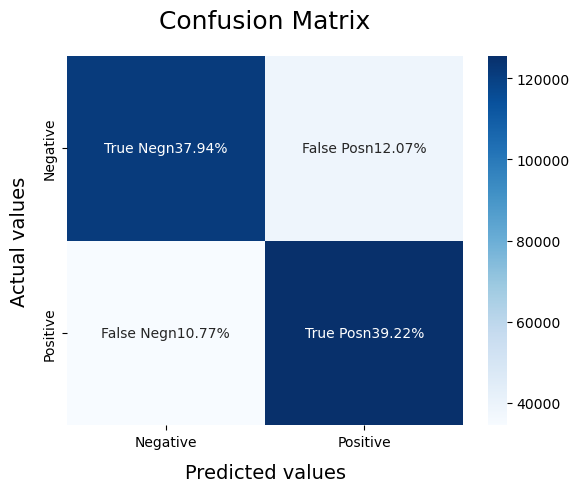

In [15]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative', 'Positive']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

plt.show()

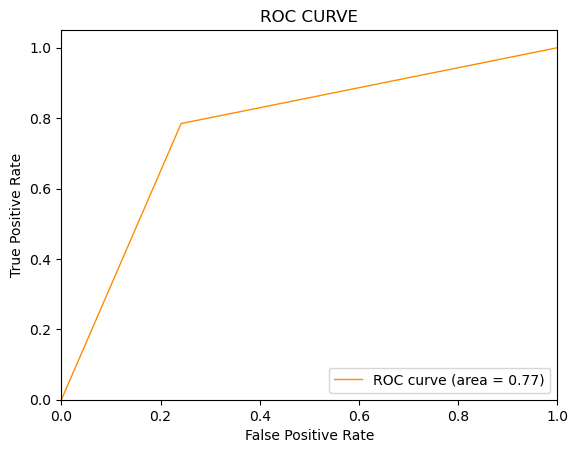

In [16]:
# Plot the ROC-AUC Curve for SVC :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()